<a href="https://colab.research.google.com/github/ZandomeneghiChiara/Hotel_Bookings/blob/main/MentalHealth_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mental health encompasses our emotional, psychological, and social well-being, influencing our thoughts,
feelings, actions, stress management, relationships, and decision-making throughout life.

 Mental health is vital for overall well-being, as it impacts physical health and vice versa.
 Depression, for instance, heightens the risk of chronic physical ailments like diabetes and heart disease, while enduring physical conditions can raise the likelihood of mental health issues.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 1 - Chosen datasets

In [2]:
# Reading datasets on mental health
data1 = pd.read_csv("1_Mental_IllnessesPrevalence.csv")
data2 = pd.read_csv("4_AdultPop_Mental_Illnesses.csv")
data3 = pd.read_csv("6_DepressiveSymptoms_Pop.csv")
data4 = pd.read_csv("7_Countries_MI_GlobalBurdenDisease.csv")

In [3]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

# 2 - Description of All Datasets

In [4]:
def describe(df):
    # Initialize lists to store information
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []

    # Iterate through each column in the DataFrame
    for column in df.columns:
        variables.append(column)
        dtypes.append(df[column].dtype)
        count.append(len(df[column]))
        unique.append(len(df[column].unique()))
        missing.append(df[column].isna().sum())

    # Create a DataFrame to store the summary statistics
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': dtypes,
        'Count': count,
        'Unique Values': unique,
        'Missing Values': missing
    })

    return summary_df

In [5]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 3 - Output of Describes

In [6]:
def print_describe_table(header, dataframe):
    print(color.BOLD + color.BLUE + color.UNDERLINE + f'"{header}"' + color.END)
    print(describe(dataframe))
    print("\n")

print_describe_table("Mental illness dataframe", df1)
print_describe_table("Adult population, mental illnesses", df2)
print_describe_table("Depressive", df3)
print_describe_table("Number of countries", df4)

"Mental illness dataframe"
                                            Variable Data Type  Count  \
0                                             Entity    object   6420   
1                                               Code    object   6420   
2                                               Year     int64   6420   
3  Schizophrenia disorders (share of population) ...   float64   6420   
4  Depressive disorders (share of population) - S...   float64   6420   
5  Anxiety disorders (share of population) - Sex:...   float64   6420   
6  Bipolar disorders (share of population) - Sex:...   float64   6420   
7  Eating disorders (share of population) - Sex: ...   float64   6420   

   Unique Values  Missing Values  
0            214               0  
1            206             270  
2             30               0  
3           6406               0  
4           6416               0  
5           6417               0  
6           6385               0  
7           6417               0  


# 4 - df1 - Mental Illnesses Prevalence

## 4.1 - EDA

In [7]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [8]:
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [9]:
df1.tail()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909
6419,Zimbabwe,ZWE,2019,0.202482,3.395476,3.137017,0.538580,0.098295


In [10]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [11]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


## 4.2 - Some plots

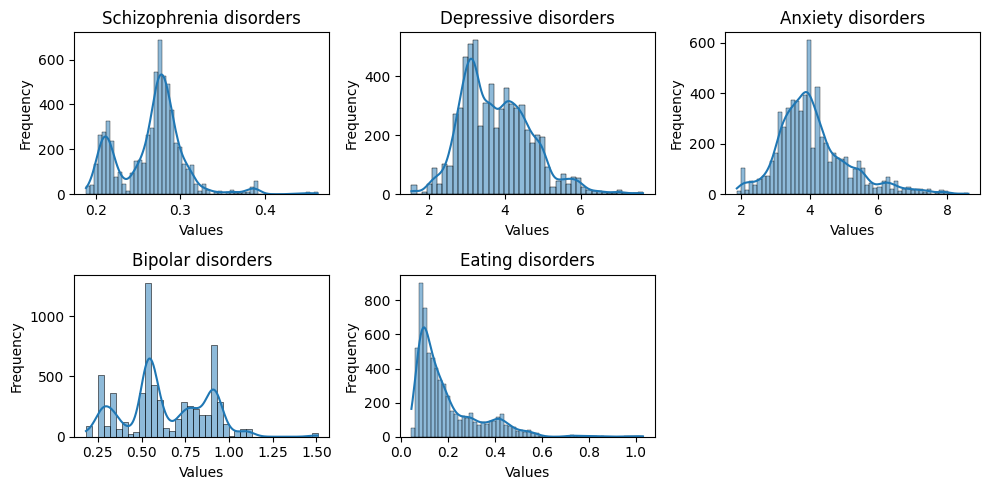

In [12]:
# Histograms
plt.figure(figsize=(10, 5))

# Define subplot grid
grid_size = (2, 3)

# Plot histograms
for i, disorder in enumerate(df1_variables.columns):
    plt.subplot2grid(grid_size, divmod(i, grid_size[1]))
    sns.histplot(df1_variables[disorder], kde=True)
    plt.title(disorder)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

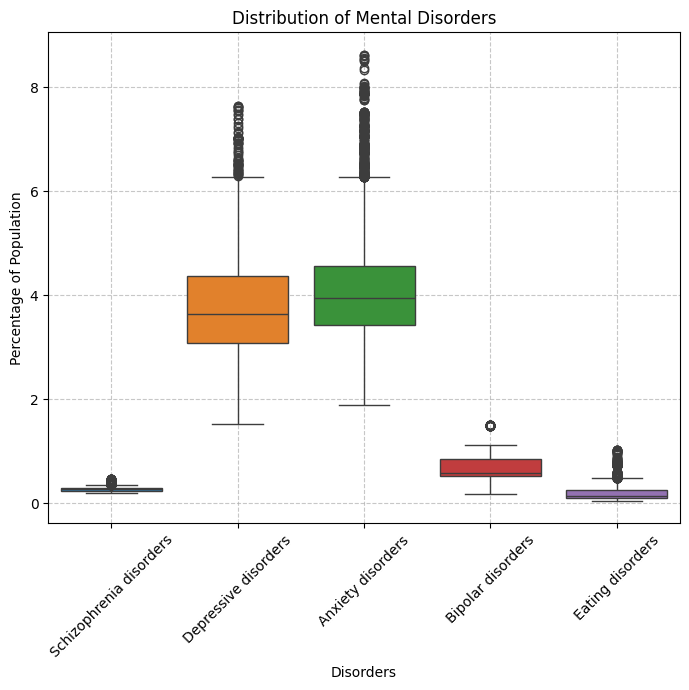

In [13]:
# Boxplots
plt.figure(figsize=(7, 7))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Set color palette for better differentiation

# Plot boxplot
sns.boxplot(data=df1_variables, palette=colors)

# Add title and axis labels
plt.title("Distribution of Mental Disorders")
plt.ylabel("Percentage of Population")
plt.xlabel("Disorders")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

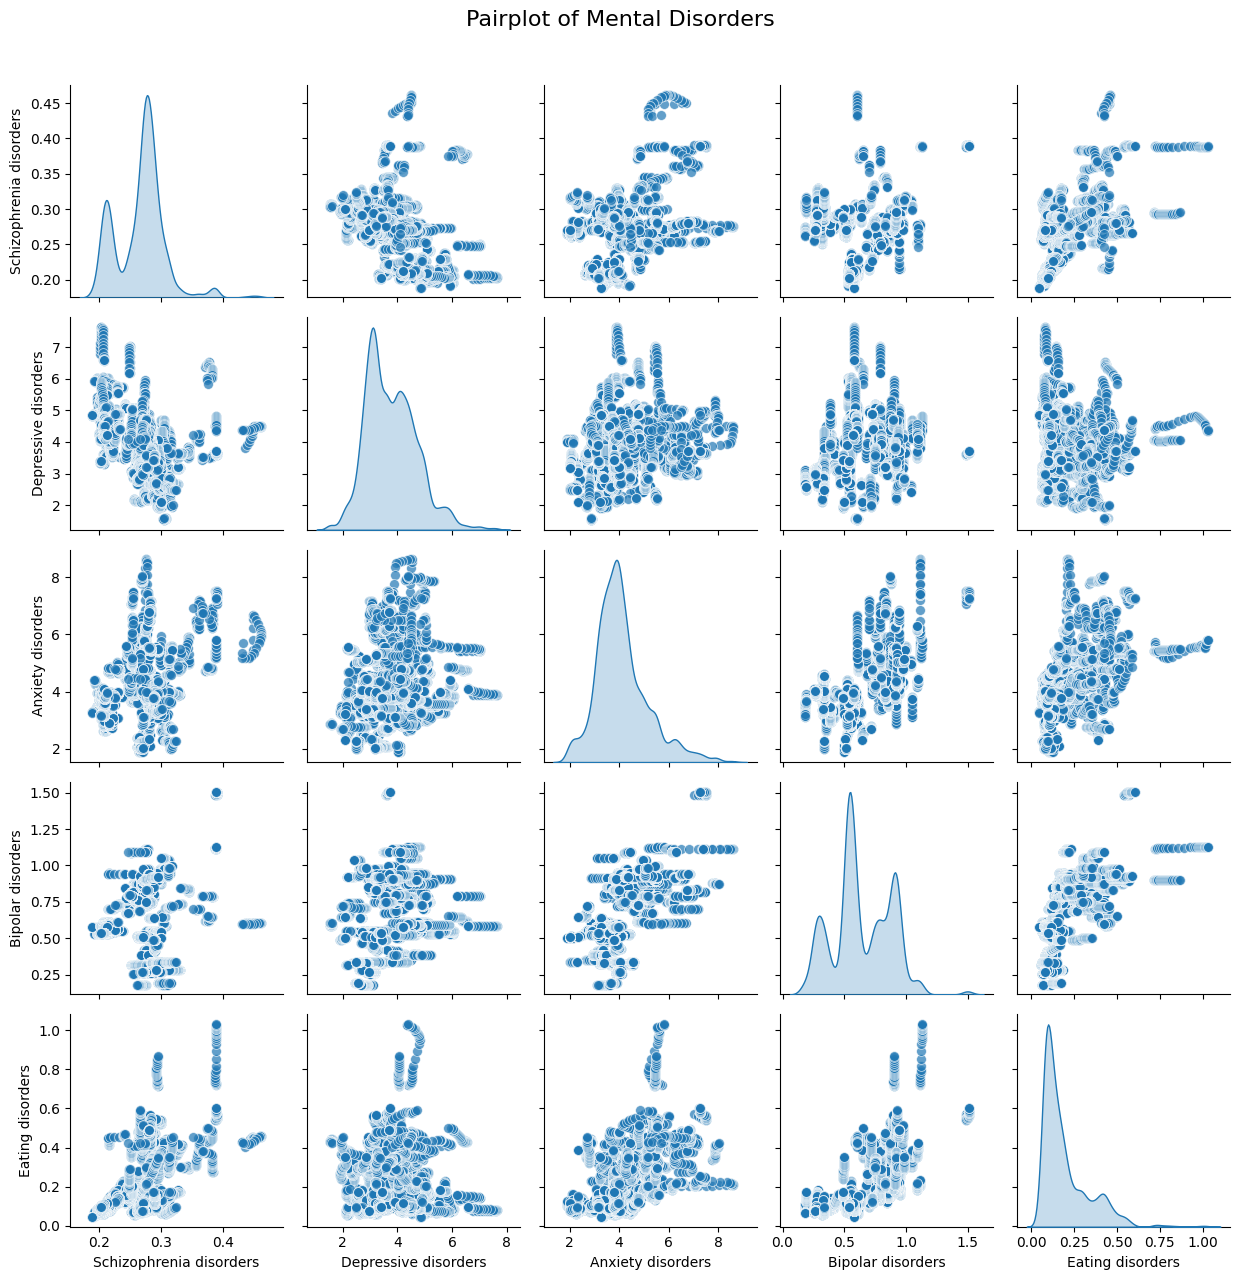

In [14]:
# Scatterplot matrix
plt.figure(figsize=(5, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]    # Define custom color palette

# Plot pairplot with custom settings
sns.pairplot(df1_variables, diag_kind='kde', palette=colors, markers='o', plot_kws={'alpha':0.7, 's': 50})

plt.suptitle("Pairplot of Mental Disorders", y=1.02, fontsize=16)

plt.tight_layout()

plt.show()

## 4.3 -  Correlation

In [15]:
# Calculate the correlation matrix
Corrmat = df1_variables.corr()

# Display the correlation matrix as a table
Corrmat.style.format(precision=2)

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Schizophrenia disorders,1.00,-0.47,0.30,0.12,0.50
Depressive disorders,-0.47,1.00,0.11,0.15,-0.05
Anxiety disorders,0.30,0.11,1.00,0.58,0.59
Bipolar disorders,0.12,0.15,0.58,1.00,0.68
Eating disorders,0.50,-0.05,0.59,0.68,1.00


<Axes: >

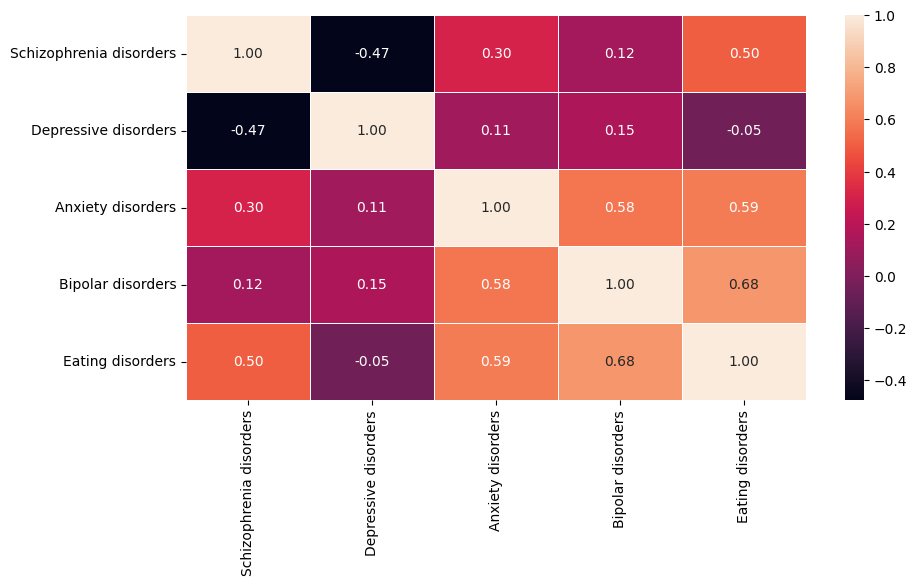

In [16]:
Corrmat = df1_variables.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

This correlation table presents the relationships between different psychological disorders. Notably, it indicates moderate to strong correlations between certain disorders, such as schizophrenia and both anxiety and eating disorders, as well as strong correlations between bipolar and eating disorders, and anxiety and bipolar disorders. Conversely, depressive disorders show weaker correlations with other disorders in this context. These insights can help in understanding potential comorbidities and inform treatment approaches.

# 5 - df2 - Adult Population covered in primary data on the Prevalence of Mental Illnesses

## 5.1 - EDA

In [17]:
df2_column_names = list(df2.columns.values)
df2_column_names

['Entity',
 'Code',
 'Year',
 'Major depression',
 'Bipolar disorder',
 'Eating disorders',
 'Dysthymia',
 'Schizophrenia',
 'Anxiety disorders']

In [18]:
df2.head()

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0


In [19]:
df2.tail()

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
17,Southern Sub-Saharan Africa,NaN,2008,0.1,0.0,0.0,0.1,<0.1,73.6
18,Tropical Latin America,NaN,2008,9.7,6.4,21.1,6.4,0,6.4
19,West Sub-Saharan Africa,NaN,2008,46.6,47.0,0.0,46.6,0,46.6
20,Western Europe,NaN,2008,73.6,19.0,57.3,7.5,12.6,81.8
21,World,OWID_WRL,2008,35.4,12.9,15.2,29.4,14.2,44.2


In [20]:
df2 = df2.rename(columns={'Major depression': 'Major depression disorders',
                          'Bipolar disorder': 'Bipolar disorders',
                          'Eating disorders':'Eating disorders disorders',
                          'Dysthymia' : 'Dysthymia disorders',
                          'Schizophrenia': 'Schizophrenia disorders',
                          'Anxiety disorders' : 'Anxiety disorders'})
df2

,Entity,Code,Year,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
5,Central Europe,NaN,2008,16.0,0.0,18.8,0.0,0,25.5
6,Central Latin America,NaN,2008,49.8,34.5,71.0,46.0,0.7,69.7
7,Central Sub-Saharan Africa,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
8,East Asia,NaN,2008,12.2,8.4,7.9,8.3,15.6,2.5
9,East Sub-Saharan Africa,NaN,2008,1.3,0.9,0.1,0.7,6.4,0.4


In [21]:
df2_variables = df2[["Entity", "Major depression disorders", "Bipolar disorders", "Eating disorders disorders",
                     "Dysthymia disorders", "Schizophrenia disorders", "Anxiety disorders"]]

df2_variables

,Entity,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
0,Andean Latin America,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,0.0,0.0,0.0,0.0,0,0.0
5,Central Europe,16.0,0.0,18.8,0.0,0,25.5
6,Central Latin America,49.8,34.5,71.0,46.0,0.7,69.7
7,Central Sub-Saharan Africa,0.0,0.0,0.0,0.0,0,0.0
8,East Asia,12.2,8.4,7.9,8.3,15.6,2.5
9,East Sub-Saharan Africa,1.3,0.9,0.1,0.7,6.4,0.4


## 5.2 - Some plots

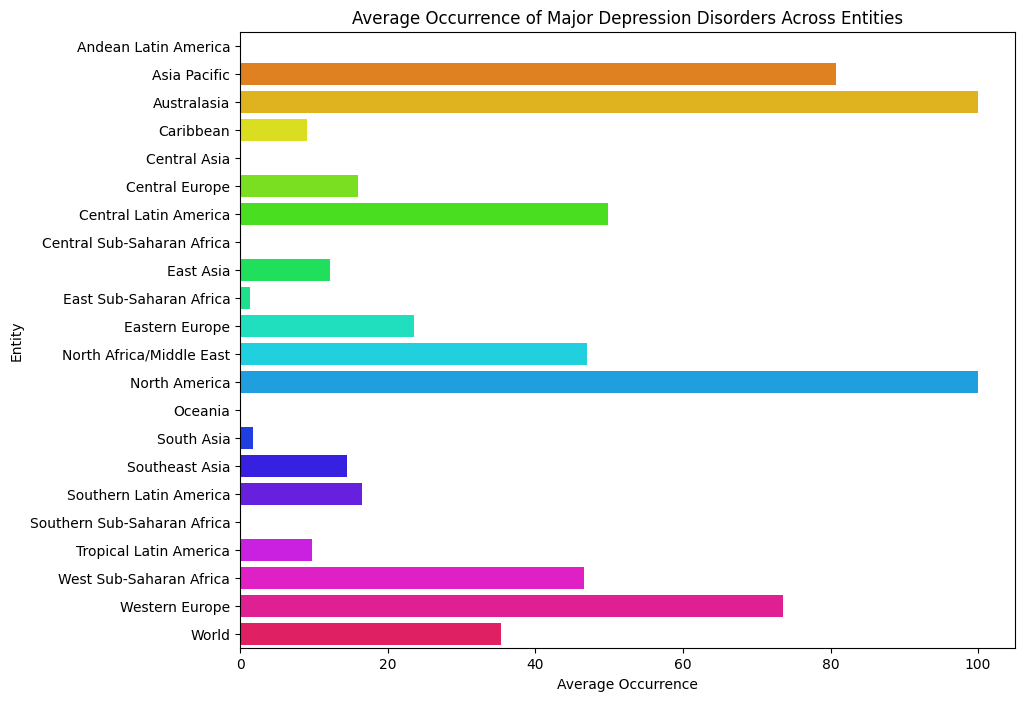

In [22]:
# BAR PLOT
# Set the color palette
colors = sns.color_palette('hsv', len(df2_variables['Entity'].unique()))  # Using 'hsv' palette for distinct colors

# Create the figure and axes
plt.figure(figsize=(10, 8))  # Adjusted figsize for horizontal plot
bars = sns.barplot(data=df2_variables, y='Entity', x='Major depression disorders', palette=colors)

# Set titles and labels
plt.title("Average Occurrence of Major Depression Disorders Across Entities")
plt.xlabel("Average Occurrence")
plt.ylabel("Entity")

# Show the plot
plt.show()

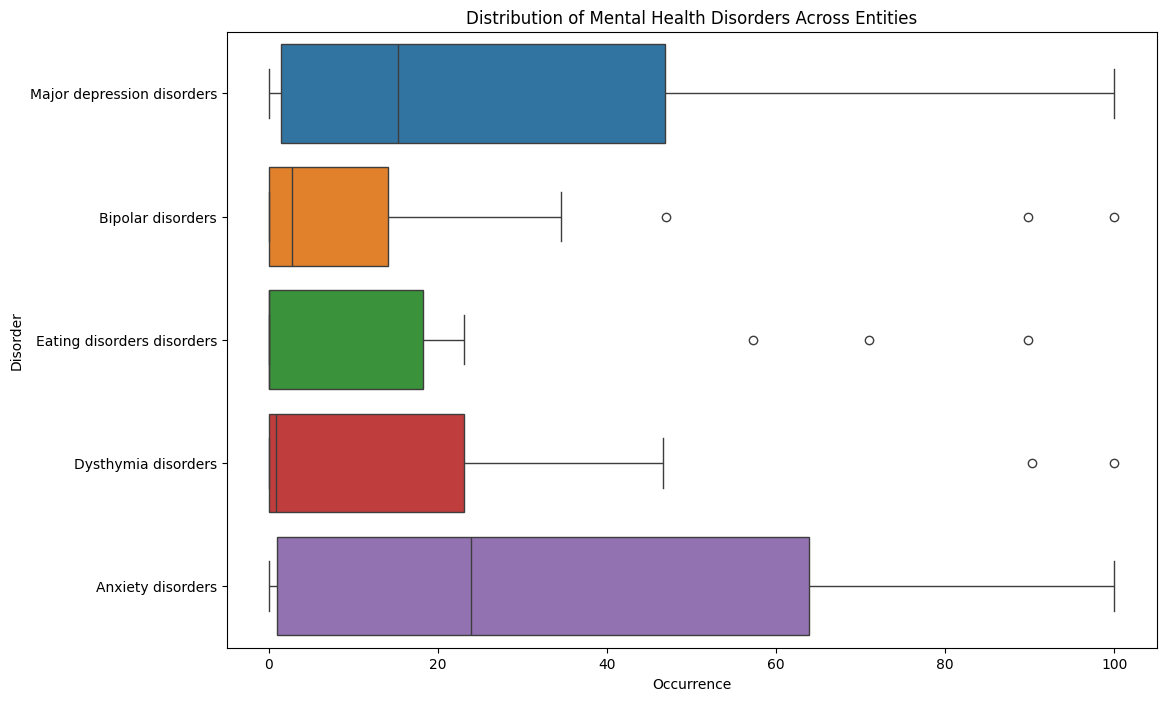

In [23]:
# Box Plot showing the distribution of each disorder across different entities
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2_variables.drop(columns='Entity'), orient='h')
plt.title("Distribution of Mental Health Disorders Across Entities")
plt.xlabel("Occurrence")
plt.ylabel("Disorder")
plt.show()

<Figure size 500x500 with 0 Axes>

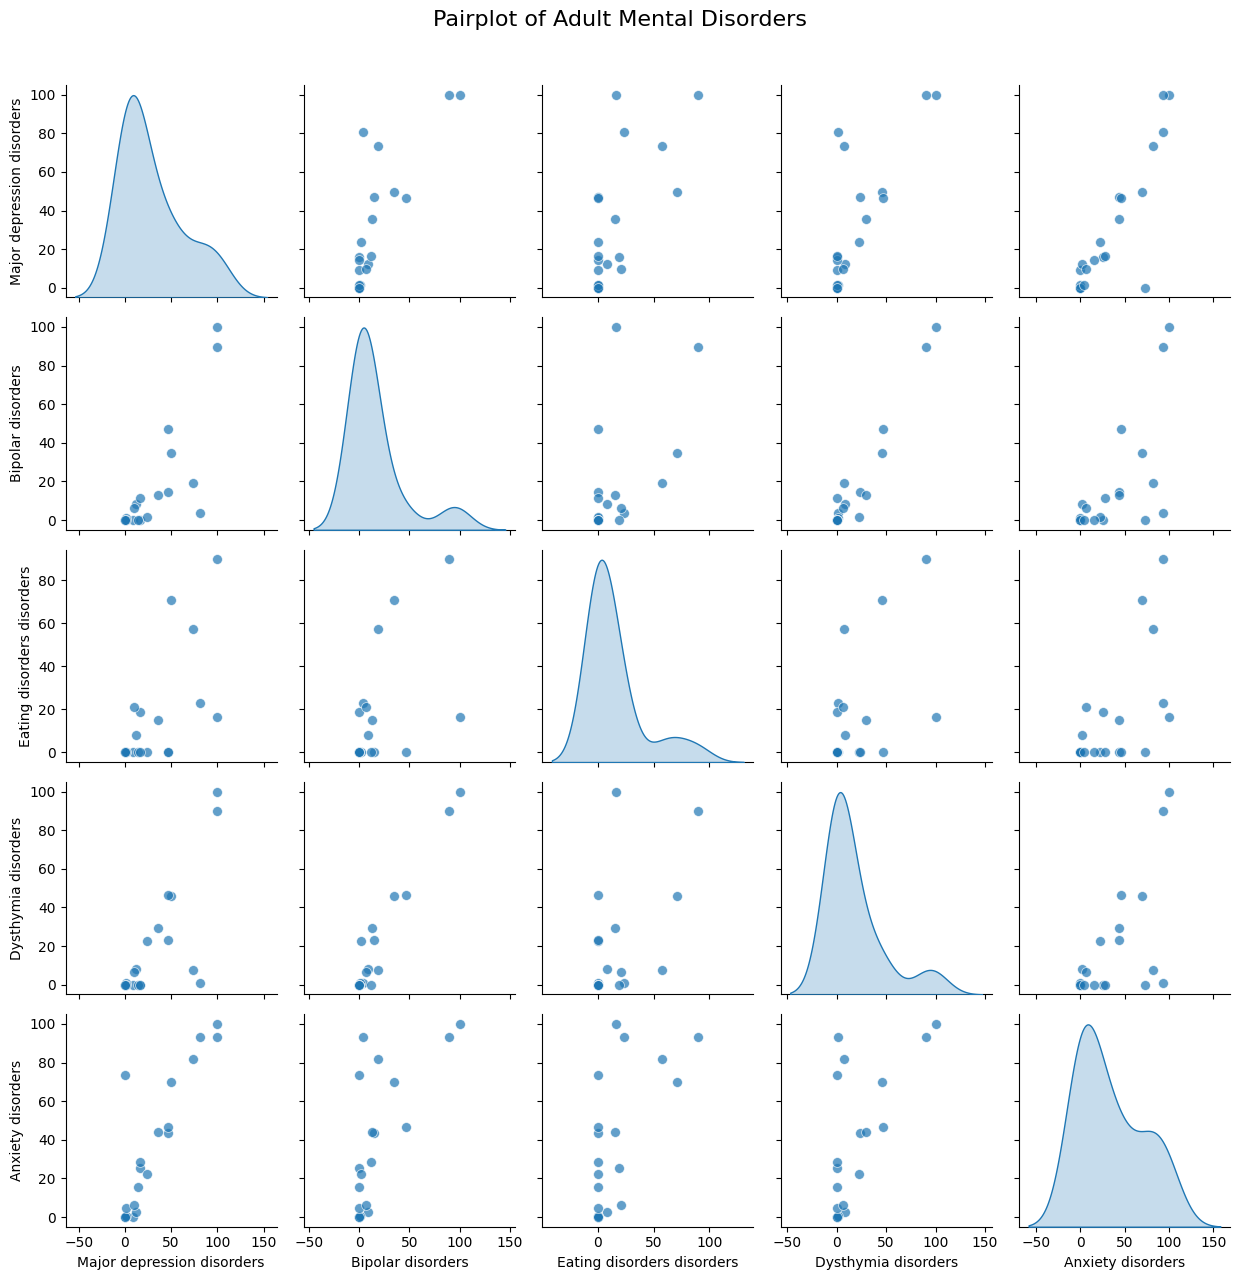

In [24]:
# Scatterplot matrix
plt.figure(figsize=(5, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]    # Define custom color palette

# Plot pairplot with custom settings
sns.pairplot(df2_variables, diag_kind='kde', palette=colors, markers='o', plot_kws={'alpha':0.7, 's': 50})

plt.suptitle("Pairplot of Adult Mental Disorders", y=1.02, fontsize=16)

plt.tight_layout()

plt.show()

## 5.3 - Correlation

In [25]:
df2_variables2 = df2[["Major depression disorders", "Bipolar disorders", "Eating disorders disorders",
                     "Dysthymia disorders", "Schizophrenia disorders", "Anxiety disorders"]]

# Identify columns containing non-numeric values
non_numeric_columns = df2_variables2.select_dtypes(exclude=['number']).columns

# Convert non-numeric values to numeric values
for column in non_numeric_columns:
    df2_variables2[column] = pd.to_numeric(df2_variables2[column], errors='coerce')

# Calculate the correlation matrix
Corrmat = df2_variables2.corr()

# Display the correlation matrix as a table
Corrmat.style.format(precision=2)

,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
Major depression disorders,1.00,0.81,0.68,0.78,0.79,0.88
Bipolar disorders,0.81,1.00,0.57,0.97,0.71,0.68
Eating disorders disorders,0.68,0.57,1.00,0.55,0.48,0.63
Dysthymia disorders,0.78,0.97,0.55,1.00,0.66,0.65
Schizophrenia disorders,0.79,0.71,0.48,0.66,1.00,0.71
Anxiety disorders,0.88,0.68,0.63,0.65,0.71,1.00


<Axes: >

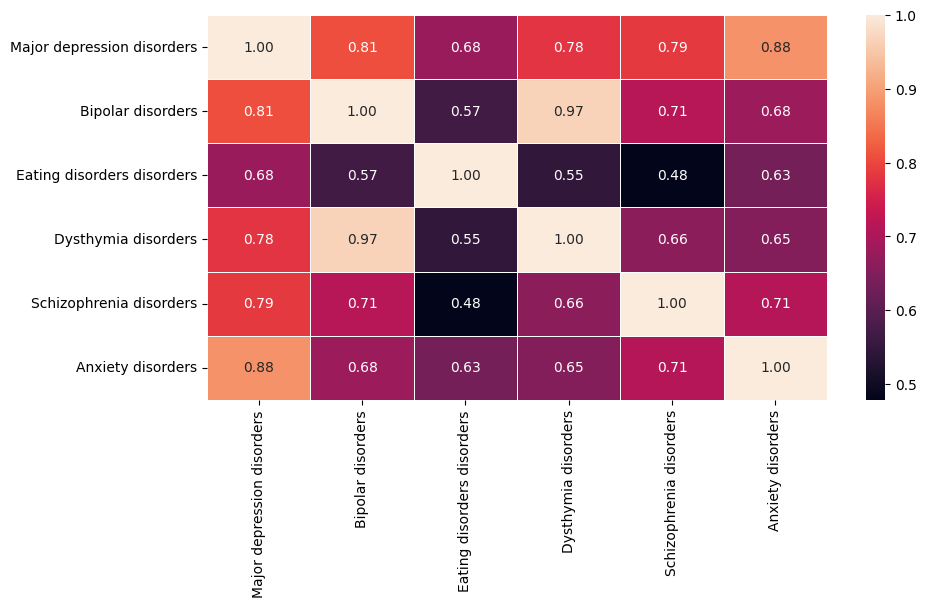

In [26]:
Corrmat = df2_variables2.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

The correlation matrix indicates significant associations between various mental health disorders. For instance, major depression disorders exhibit strong correlations with anxiety disorders (0.88) and bipolar disorders (0.81), suggesting potential shared underlying mechanisms or comorbidity. Similarly, bipolar disorders demonstrate notable associations with dysthymia disorders (0.97), indicating a possible continuum of mood disturbances. These findings highlight the interconnected nature of mental health conditions, underscoring the importance of comprehensive assessment and integrated treatment approaches.

# 6 - Join the areas

In [34]:
# unique values entity df1
unique_entities = df1['Entity'].unique()
print("Unique values of 'Entity':")
print(unique_entities)

entity_counts = df1['Entity'].value_counts()  # Count the unique values of 'Entity'

# Print the counts
print("Counts of unique values of 'Entity':")
print(entity_counts)

Unique values of 'Entity':
['Afghanistan' 'Africa (IHME GBD)' 'Albania' 'Algeria'
 'America (IHME GBD)' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia (IHME GBD)' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe (IHME GBD)' 'European Union (27)' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guat

In [35]:
# unique values entity df2
unique_entities = df2['Entity'].unique()
print("Unique values of 'Entity':")
print(unique_entities)

entity_counts = df2['Entity'].value_counts()  # Count the unique values of 'Entity'

# Print the counts
print("Counts of unique values of 'Entity':")
print(entity_counts)

Unique values of 'Entity':
['Andean Latin America' 'Asia Pacific' 'Australasia' 'Caribbean'
 'Central Asia' 'Central Europe' 'Central Latin America'
 'Central Sub-Saharan Africa' 'East Asia' 'East Sub-Saharan Africa'
 'Eastern Europe' 'North Africa/Middle East' 'North America' 'Oceania'
 'South Asia' 'Southeast Asia' 'Southern Latin America'
 'Southern Sub-Saharan Africa' 'Tropical Latin America'
 'West Sub-Saharan Africa' 'Western Europe' 'World']
Counts of unique values of 'Entity':
Entity
Andean Latin America           1
Asia Pacific                   1
Western Europe                 1
West Sub-Saharan Africa        1
Tropical Latin America         1
Southern Sub-Saharan Africa    1
Southern Latin America         1
Southeast Asia                 1
South Asia                     1
Oceania                        1
North America                  1
North Africa/Middle East       1
Eastern Europe                 1
East Sub-Saharan Africa        1
East Asia                      1
Central 

In [36]:
# Create a dictionary mapping each entity to its corresponding area
area_mapping = {
    'Andean Latin America': ['Bolivia', 'Colombia', 'Ecuador', 'Peru', 'Venezuela'],
    'Asia Pacific': ['Australia', 'Bangladesh', 'China', 'India', 'Indonesia', 'Japan', 'Malaysia', 'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam'],
    'Australasia': ['Australia', 'New Zealand'],
    'Caribbean': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago'],
    'Central Asia': ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'],
    'Central Europe': ['Austria', 'Czechia', 'Germany', 'Hungary', 'Poland', 'Slovakia', 'Slovenia', 'Switzerland'],
    'Central Latin America': ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama'],
    'Central Sub-Saharan Africa': ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe'],
    'East Asia': ['China', 'Japan', 'North Korea', 'South Korea', 'Taiwan'],
    'East Sub-Saharan Africa': ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Eastern Europe': ['Belarus', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Moldova', 'Romania', 'Russia', 'Ukraine'],
    'North Africa/Middle East': ['Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'Turkey', 'United Arab Emirates', 'Yemen'],
    'North America': ['Canada', 'United States'],
    'Oceania': ['Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South Asia': ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'],
    'Southeast Asia': ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'],
    'Southern Latin America': ['Argentina', 'Brazil', 'Chile', 'Paraguay', 'Uruguay'],
    'Southern Sub-Saharan Africa': ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa'],
    'Tropical Latin America': ['Brazil', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Suriname', 'Venezuela'],
    'West Sub-Saharan Africa': ['Benin', 'Burkina Faso', 'Cabo Verde', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo'],
    'Western Europe': ['Andorra', 'Belgium', 'France', 'Ireland', 'Luxembourg', 'Monaco', 'Netherlands', 'Portugal', 'Spain', 'United Kingdom'],
    'World': ['World']
}


In [37]:
# Create an empty dictionary to store the reverse mapping
reverse_area_mapping = {}

# Iterate through the area_mapping dictionary
for area, entities in area_mapping.items():
    # Iterate through the entities in each area
    for entity in entities:
        # Add the entity as a key and the area as a value to the reverse mapping dictionary
        reverse_area_mapping.setdefault(entity, []).append(area)

# Apply the reverse mapping to all states in df1
df1['Area'] = df1['Entity'].map(reverse_area_mapping)

# Print the first few rows of df1 to verify the mapping
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders,Area
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,[South Asia]
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,[South Asia]
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,[South Asia]
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,[South Asia]
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,[South Asia]
...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652,[East Sub-Saharan Africa]
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662,[East Sub-Saharan Africa]
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330,[East Sub-Saharan Africa]
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909,[East Sub-Saharan Africa]


In [38]:
df1.isna().sum()

Entity                        0
Code                        270
Year                          0
Schizophrenia disorders       0
Depressive disorders          0
Anxiety disorders             0
Bipolar disorders             0
Eating disorders              0
Area                       1290
dtype: int64

In [39]:
# Filter rows where 'Area' value is NaN
nan_area_rows = df1[df1['Area'].isna()]

# Print the rows
print("Rows with NaN 'Area' value:")
print(nan_area_rows)

Rows with NaN 'Area' value:
                             Entity Code  Year  Schizophrenia disorders  \
30                Africa (IHME GBD)  NaN  1990                 0.219527   
31                Africa (IHME GBD)  NaN  1991                 0.219559   
32                Africa (IHME GBD)  NaN  1992                 0.219579   
33                Africa (IHME GBD)  NaN  1993                 0.219583   
34                Africa (IHME GBD)  NaN  1994                 0.219556   
...                             ...  ...   ...                      ...   
6145  Upper-middle-income countries  NaN  2015                 0.290310   
6146  Upper-middle-income countries  NaN  2016                 0.292403   
6147  Upper-middle-income countries  NaN  2017                 0.294482   
6148  Upper-middle-income countries  NaN  2018                 0.294354   
6149  Upper-middle-income countries  NaN  2019                 0.293744   

      Depressive disorders  Anxiety disorders  Bipolar disorders  \
30 